# Linear Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
#converting string values to numeric based so that we can utilize these for model building

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['CarName'] = le.fit_transform(data['CarName'])
data['price'] = le.fit_transform(data['price'])
data.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,118
1,2,3,3,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,137


In [7]:
x = data.iloc[:,2:3]
x.head(1)

,CarName
0,2


In [8]:
y = data.iloc[:,-1:]
y.head(1)

,price
0,118


In [9]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [12]:
xtrain,ytrain

(     CarName
 106       70
 90        73
 147      111
 185      137
 95        74
 ..       ...
 133      103
 137      101
 72        23
 140      107
 37        36
 
 [164 rows x 1 columns],
      price
 106    156
 90      30
 147     87
 185     56
 95      46
 ..     ...
 133    107
 137    158
 72     181
 140     40
 37      47
 
 [164 rows x 1 columns])

In [14]:
xtest,ytest

(     CarName
 78        68
 97        78
 151      120
 44        45
 40        36
 67        19
 98        70
 18        24
 152      116
 62        59
 4          5
 172      124
 197      141
 38        41
 29        31
 170      127
 190      146
 33        37
 136      102
 145      109
 173      115
 31        43
 11        10
 119       89
 169      126
 34        43
 84        66
 184      133
 120       92
 35        38
 163      118
 28        33
 16        14
 130       99
 116       85
 182      129
 27        30
 47        49
 58        55
 204      143
 138      104,
      price
 78      19
 97      52
 151     12
 44      66
 40      89
 67     171
 98      58
 18       1
 152     15
 62      88
 4      148
 172    149
 197    139
 38      70
 29     114
 170     97
 190     83
 33      16
 136    153
 145    100
 173     68
 31      25
 11     145
 119     49
 169     85
 34      32
 84     125
 184     51
 120     10
 35      34
 163     54
 28      67
 16     187
 13

In [15]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
#training data
print('Training Started...........')
slr.fit(xtrain,ytrain)
print('Training Completed...........')

Training Started...........
Training Completed...........


In [16]:
#Test data
ypred = slr.predict(xtest)

### Visualize the traning dataset

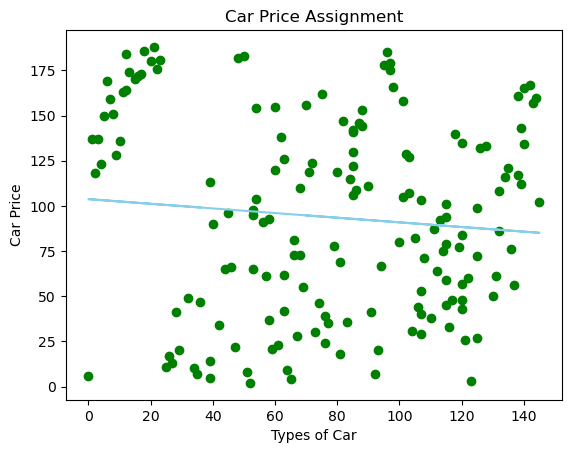

In [17]:
plt.scatter(xtrain,ytrain,color='green')
plt.plot(xtrain, slr.predict(xtrain),color='skyblue')
plt.title('Car Price Assignment')
plt.xlabel('Types of Car')
plt.ylabel('Car Price')
plt.show()

### Visualize the Test dataset

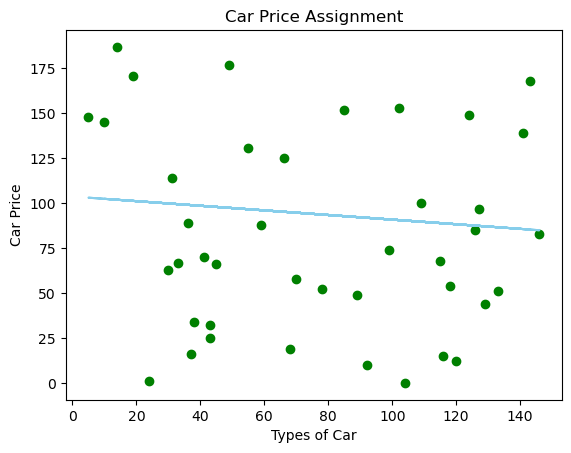

In [18]:
plt.scatter(xtest,ytest,color='green')
plt.plot(xtest, slr.predict(xtest),color='skyblue')
plt.title('Car Price Assignment')
plt.xlabel('Types of Car')
plt.ylabel('Car Price')
plt.show()

### Evaluate simple linear regression

In [19]:
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score


print('MSE \t',mean_squared_error(ytest,ypred))
print('RMSE \t',np.sqrt(mean_squared_error(ytest,ypred)))
print('R-Square :\t',r2_score(ytest,ypred))

MSE 	 2992.1159832938474
RMSE 	 54.70023750674075
R-Square :	 -0.035105414823816794


In [21]:
print('intercept/constant \t',slr.intercept_)
print('Coefficient/slope \t',slr.coef_)

intercept/constant 	 [103.73896765]
Coefficient/slope 	 [[-0.12851452]]


#### Multiple Linear Regression

In [52]:
#converting string values to numeric based so that we can utilize these for model building

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['CarName'] = le.fit_transform(data['CarName'])
data['price'] = le.fit_transform(data['price'])
data['fueltype'] = le.fit_transform(data['fueltype'])

data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,118
1,2,3,3,1,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,137
2,3,1,1,1,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,137
3,4,2,4,1,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,123
4,5,2,5,1,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,1,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,143
201,202,-1,138,1,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,161
202,203,-1,140,1,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,165
203,204,-1,142,0,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,167


In [35]:
x = data.iloc[:,2:4]
x.head(1)

,CarName,fueltype
0,2,1


In [36]:
y = data.iloc[:,-1:]
y.head(1)

,price
0,118


In [37]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)
#training data
slr.fit(xtrain,ytrain)
#Test data
ypred = slr.predict(xtest)

In [38]:
print('MSE \t',mean_squared_error(ytest,ypred))
print('RMSE \t',np.sqrt(mean_squared_error(ytest,ypred)))
print('R-Square :\t',r2_score(ytest,ypred))

MSE 	 2929.220412927527
RMSE 	 54.12227279898293
R-Square :	 -0.013347051906700935


In [55]:
unseen_data = slr.predict(np.array([[100,2]]))

C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [56]:
unseen_data

array([[60.99241914]])